In [2]:
import numpy as np
import pandas as pd


# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [48]:

data = pd.read_csv("../data/adult.csv")

data = data.replace("?", np.nan)



data["salary"] = data["salary"].replace({"<=50K.": "<=50K", ">50K.": ">50K"})
data["salary_K"] = data["salary"].apply(lambda x: 0 if x == "<=50K" else 1)
data = data.drop("salary", axis=1)
data = data.dropna()


       Unnamed: 0  age         workclass   education      marital-status   
0               0   39         State-gov   Bachelors       Never-married  \
1               1   50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2               2   38           Private     HS-grad            Divorced   
3               3   53           Private        11th  Married-civ-spouse   
4               4   28           Private   Bachelors  Married-civ-spouse   
...           ...  ...               ...         ...                 ...   
32556       32556   27           Private  Assoc-acdm  Married-civ-spouse   
32557       32557   40           Private     HS-grad  Married-civ-spouse   
32558       32558   58           Private     HS-grad             Widowed   
32559       32559   22           Private     HS-grad       Never-married   
32560       32560   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex  hours-per-week   
0           A

# Task 1
Print the count of men and women in the dataset.

In [33]:
sex_counts  = data["sex"].value_counts()
print(sex_counts)

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [34]:
men_data = data[data["sex"] == "Male"] # filter to include only men
men_age_mean = men_data["age"].mean()
print("Average age of men in dataset:", men_age_mean)

Average age of men in dataset: 39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [35]:
poland_data = data[data["native-country"] == "Poland"]
poland_percent = (len(poland_data) / len(data)) * 100
print("Percentage of people from Poland in dataset:", poland_percent)

Percentage of people from Poland in dataset: 0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [49]:
high_income_data = data[data["salary"] == ">50K"]
high_income_age_mean = high_income_data["age"].mean()
high_income_age_std = high_income_data["age"].std()


low_income_data = data[data["salary"] == "<=50K"]
low_income_age_mean = low_income_data["age"].mean()
low_income_age_std = low_income_data["age"].std()

print("Age statistics for people who earn > 50K per year:")
print("Mean age:", high_income_age_mean)
print("Standard deviation of age:", high_income_age_std)

print("Age statistics for people who earn <= 50K per year:")
print("Mean age:", low_income_age_mean)
print("Standard deviation of age:", low_income_age_std)

Age statistics for people who earn > 50K per year:
Mean age: 43.95911028236548
Standard deviation of age: 10.269632835673852
Age statistics for people who earn <= 50K per year:
Mean age: 36.60806038668668
Standard deviation of age: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [3]:

higher_education_levels = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

high_income_data = data[data["salary"] == ">50K"]

non_higher_edu_high_income_data = high_income_data[~high_income_data["education"].isin(higher_education_levels)]

if len(non_higher_edu_high_income_data) > 0:
    print("There are some people with > 50K salary but without higher education:")
    print(non_higher_edu_high_income_data)
else:
    print("There are no people with > 50K salary but without higher education.")

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [50]:
age_stats_by_education = data.groupby("education")["age"].describe()

print(age_stats_by_education)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [51]:
married_men = data[(data["sex"] == "Male") & (data["marital-status"].str.startswith("Married"))]

non_married_men = data[(data["sex"] == "Male") & (~data["marital-status"].str.startswith("Married"))]

married_men_mean_salary = married_men.groupby("salary")["salary K$"].mean()
non_married_men_mean_salary = non_married_men.groupby("salary")["salary K$"].mean()

print("Married men:")
print(married_men_mean_salary)

print("Non-married men:")
print(non_married_men_mean_salary)

Married men:
salary
<=50K     31.927538
>50K     200.609820
Name: salary K$, dtype: float64
Non-married men:
salary
<=50K     32.091316
>50K     196.010401
Name: salary K$, dtype: float64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [53]:
max_hours_per_week = data["hours-per-week"].max()
print("Max hours per week: ", max_hours_per_week)
num_people_max_hours = data[data["hours-per-week"] == max_hours_per_week].shape[0]
print("Number of people who work", max_hours_per_week, "hours per week: ", num_people_max_hours)

Max hours per week:  99
Number of people who work 99 hours per week:  78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

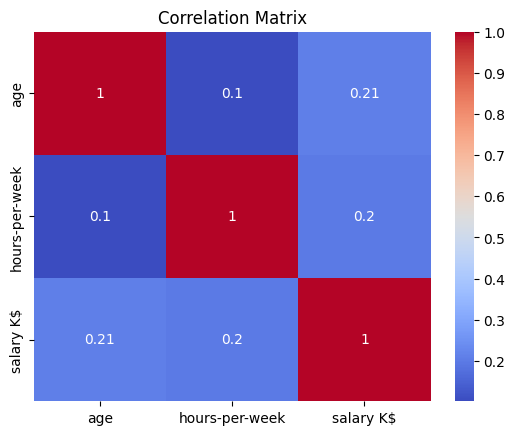

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data[["age", "hours-per-week", "salary K$"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
print("From the heatmap, we can see that there is a positive correlation between age and salary, which makes sense as people generally earn more as they gain more experience. We can also see a positive correlation between hours-per-week and salary, which is again expected as people who work more hours are likely to earn more.Overall, the heatmap shows that there is a moderate positive correlation between age, hours-per-week and salary.")